# **Big Mart Sales Prediction**

**Problem Statement**


The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

why predicting is useful hare?
> 1. stores which play a key role in increasing sales.
2. understand the properties of products.
3. precieve challanges early.
4. aid future marketing plans.
5. predict the sales revenue.

its a regression based ML project.


**Hypothesis Generation**

> Product Visbility: Products with large display area should have higher Sales.
> Outlet_Size: Stores with large size should have higher Sales.
> Item_Type:
> 1. Products that are made from a well-known brand will have higher Sales.
2. mostly used Products will have higher Sales.

> Item_MRP: Products with least cost sould have higher Sales
> Outlet_Establishment_Year: oldest stores will have higher Sales
> Outlet_Location_city:
> 1. Store located in popular market place shoud have higher Sales.
2. City with high population should have higher Sales.

> Products with offers will have higher Sales.


**Loading Packages and Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [2]:
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


**Data Structure and Content**

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


Variable | Description
----------|--------------
Item_Identifier | Unique product ID
Item_Weight | Weight of product
Item_Fat_Content | Whether the product is low fat or not
Item_Visibility | The % of total display area of all products in a    store allocated to the particular product
Item_Type | The category to which the product belongs
Item_MRP | Maximum Retail Price (list price) of the product
Outlet_Identifier | Unique store ID
Outlet_Establishment_Year | The year in which store was established
Outlet_Size | The size of the store in terms of ground area covered
Outlet_Location_Type | The type of city in which the store is located
Outlet_Type | Whether the outlet is just a grocery store or some sort of supermarket
Item_Outlet_Sales | Sales of the product in the particulat store. This is the outcome variable to be predicted.

**Exploratory Data Analysis**

> check duplication

In [5]:
df_train.duplicated().any()

False

In [6]:
df_test.duplicated().any()

False

In [7]:
print(df_train.shape)
print(df_test.shape)

(8523, 12)
(5681, 11)


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [10]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


> check null values

In [12]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [14]:
df_train.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [15]:
df_test.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

In [16]:
df_train.corr()

<ipython-input-16-81897f4db25c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<ipython-input-17-dbbd111c6319>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True)


<Axes: >

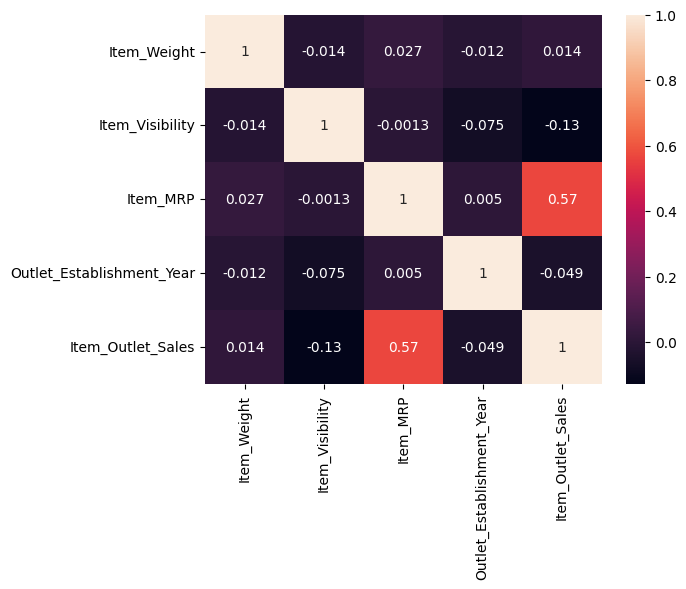

In [17]:
sns.heatmap(df_train.corr(), annot=True)

In [18]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

in the previous cell 'Item_Fat_Content' has two values mean the same.

        Low Fat=LF=low fat
        Regular=reg

so we need to solve this issue, and will be solved in the feature engineering section

In [19]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [20]:
df_train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [21]:
df_train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [22]:
df_train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

according to the previous cells there is no issues in the other features except  'Item_Fat_Content'

check outliers

<Axes: >

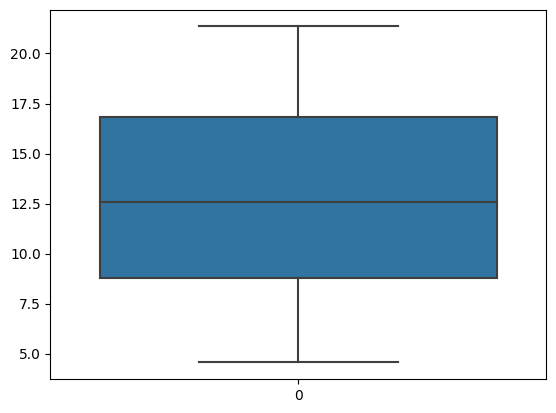

In [23]:
sns.boxplot(df_train['Item_Weight'])

<Axes: >

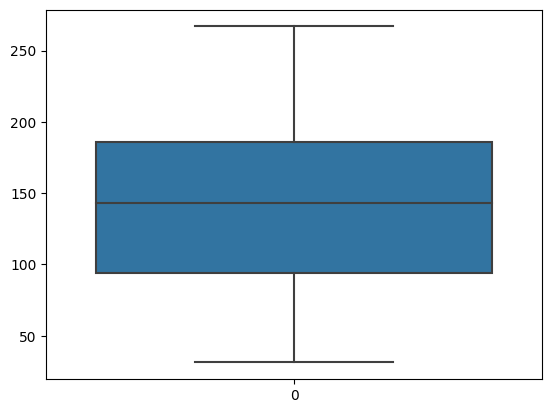

In [24]:
sns.boxplot(df_train['Item_MRP'])

<Axes: >

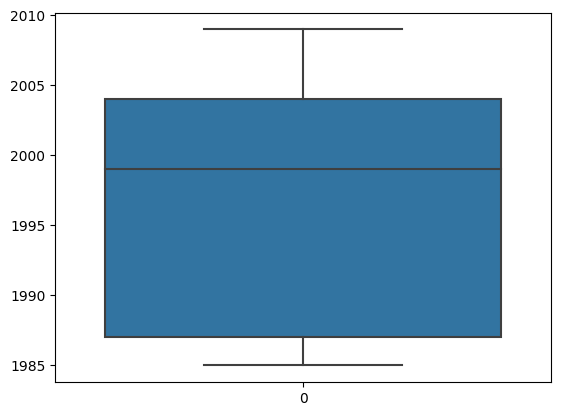

In [25]:
sns.boxplot(df_train['Outlet_Establishment_Year'])

<Axes: >

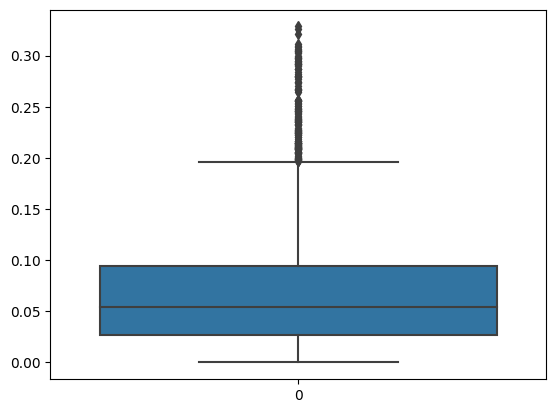

In [26]:
sns.boxplot(df_train['Item_Visibility'])

<Axes: >

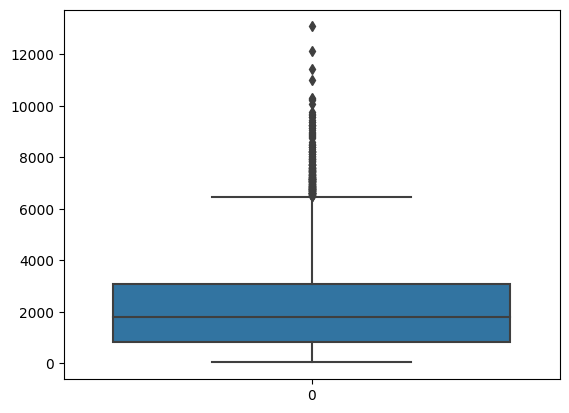

In [27]:
sns.boxplot(df_train['Item_Outlet_Sales'])

> see the outlier Values

<Axes: >

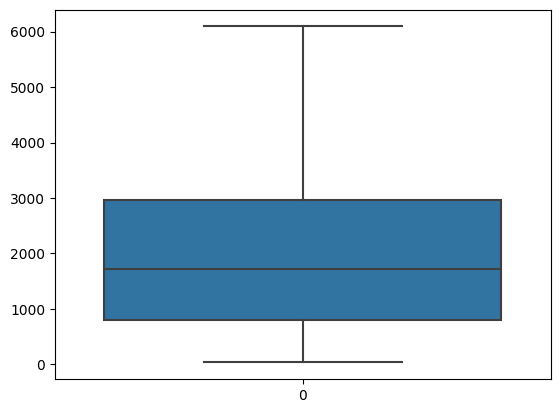

In [28]:
max_Item_Outlet_Sales = df_train['Item_Outlet_Sales'].quantile(.97)
new_df = df_train[(df_train['Item_Outlet_Sales'] < max_Item_Outlet_Sales) ]
sns.boxplot(new_df['Item_Outlet_Sales'])

<Axes: >

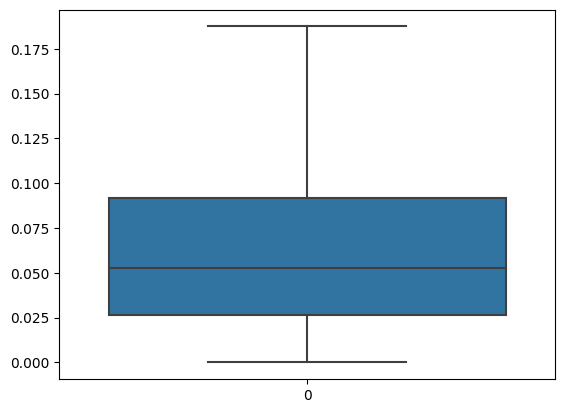

In [29]:
max_Item_Visibility = df_train['Item_Visibility'].quantile(.98)
new_df = df_train[(df_train['Item_Visibility'] < max_Item_Visibility) ]
sns.boxplot(new_df['Item_Visibility'])

we will treat outliears in the feature engineering section

**Univariate Analysis**

> distplot for numerical data

<ipython-input-30-122bc78d9eda>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Item_Weight'])


<Axes: xlabel='Item_Weight', ylabel='Density'>

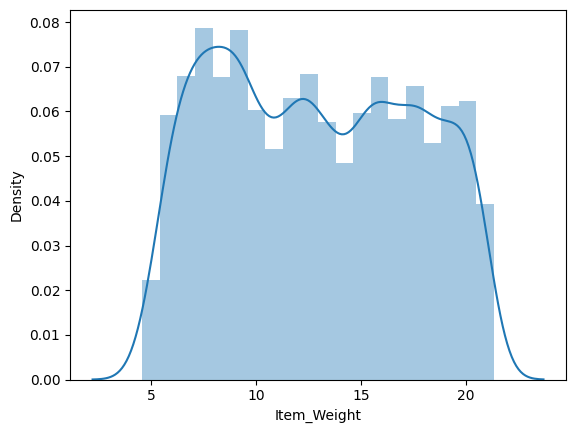

In [30]:
sns.distplot(df_train['Item_Weight'])

<ipython-input-31-e380e7caa132>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Item_MRP'])


<Axes: xlabel='Item_MRP', ylabel='Density'>

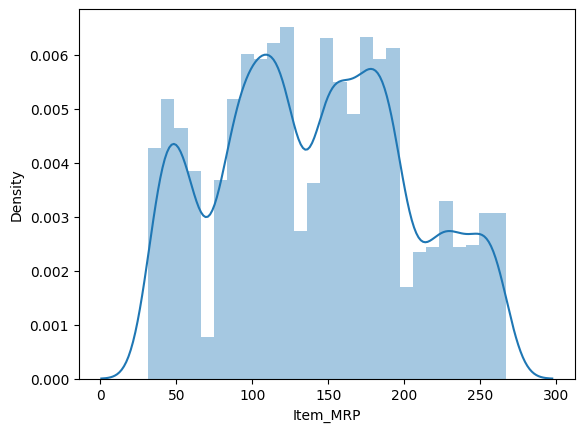

In [31]:
sns.distplot(df_train['Item_MRP'])

<ipython-input-32-c49dff902586>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Item_Visibility'])


<Axes: xlabel='Item_Visibility', ylabel='Density'>

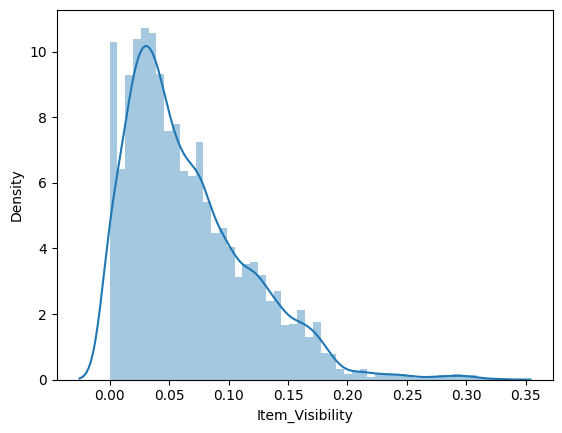

In [32]:
sns.distplot(df_train['Item_Visibility'])

<ipython-input-33-7b2e6f39f779>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Item_Outlet_Sales'])


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

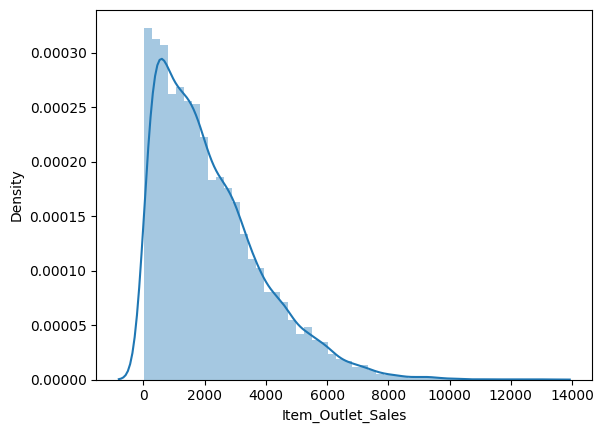

In [33]:
sns.distplot(df_train['Item_Outlet_Sales'])

the previous two charts are right skewed distribution.
will be solved in the feature engineering section

> countplots for categorial data

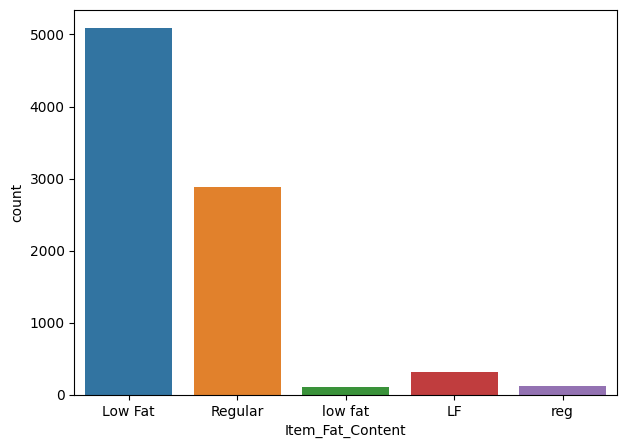

In [34]:
plt.figure(figsize=(7,5))
sns.countplot(data=df_train, x='Item_Fat_Content')
plt.show()

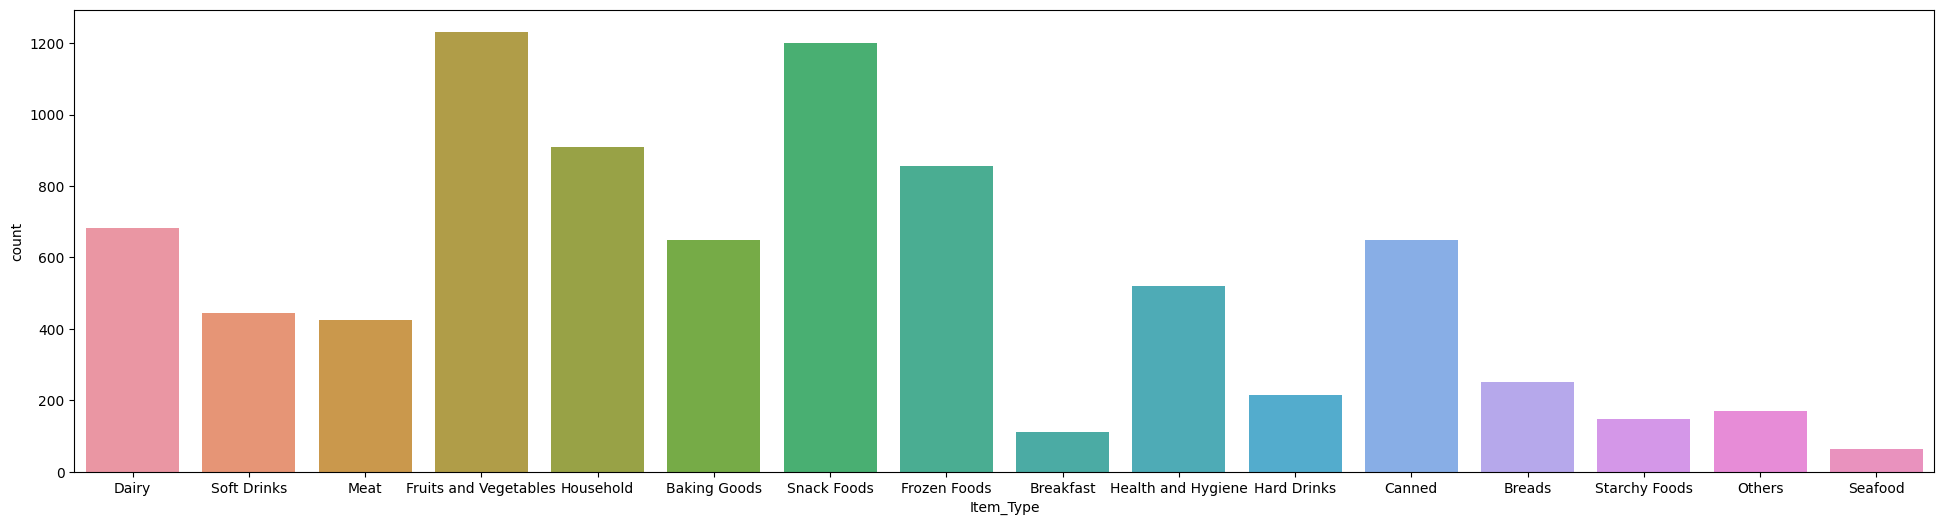

In [35]:
#   Item_Type " Category"
plt.figure(figsize=(24,6))
sns.countplot(data=df_train, x='Item_Type')
plt.show()

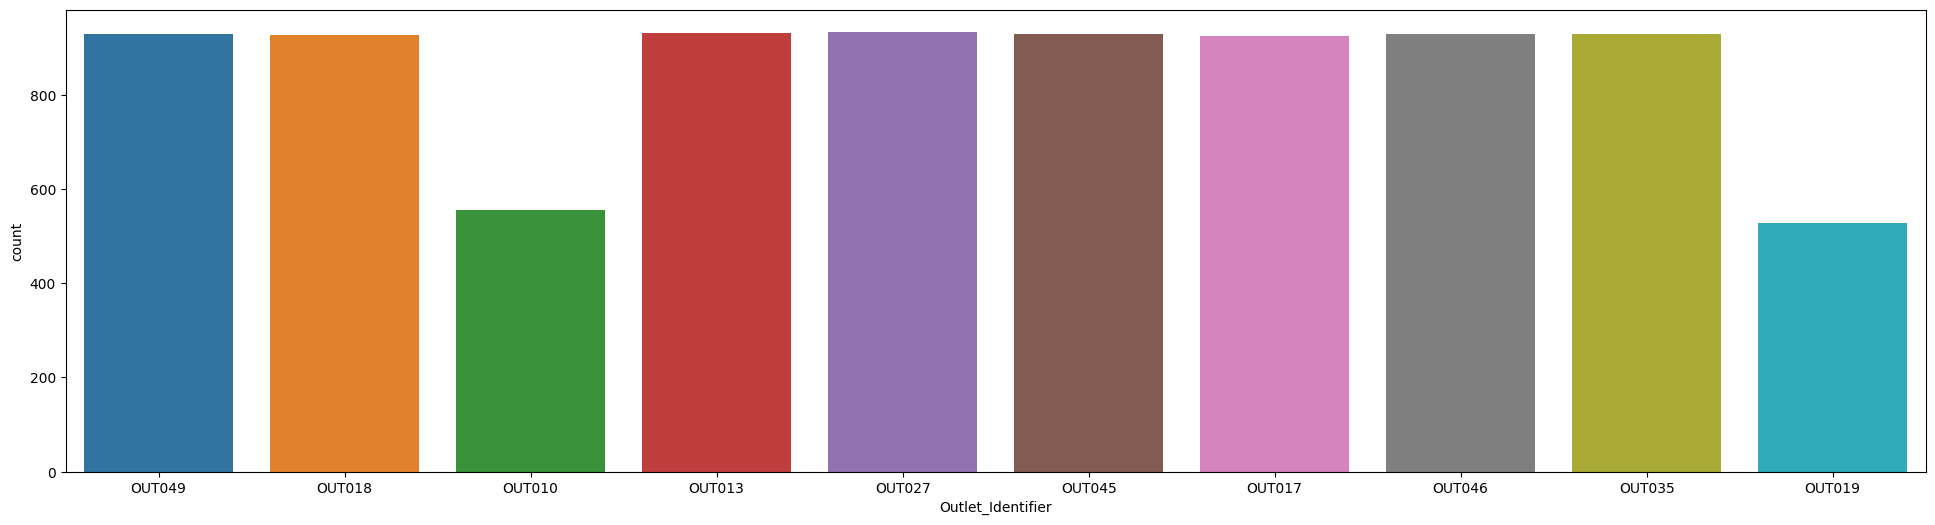

In [36]:
plt.figure(figsize=(24,6))
sns.countplot(data=df_train, x='Outlet_Identifier')
plt.show()

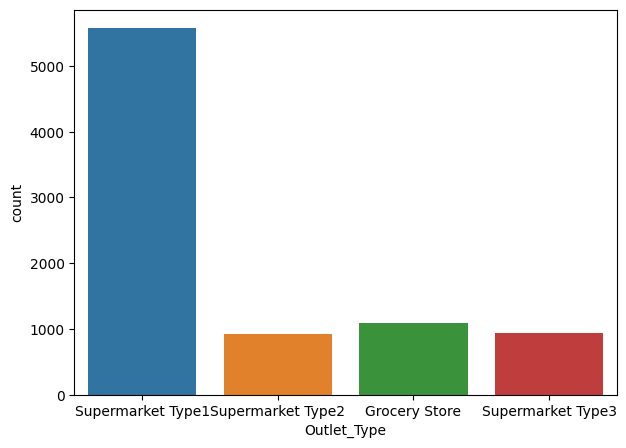

In [37]:
#   Store Type
plt.figure(figsize=(7,5))
sns.countplot(data=df_train, x='Outlet_Type')
plt.show()

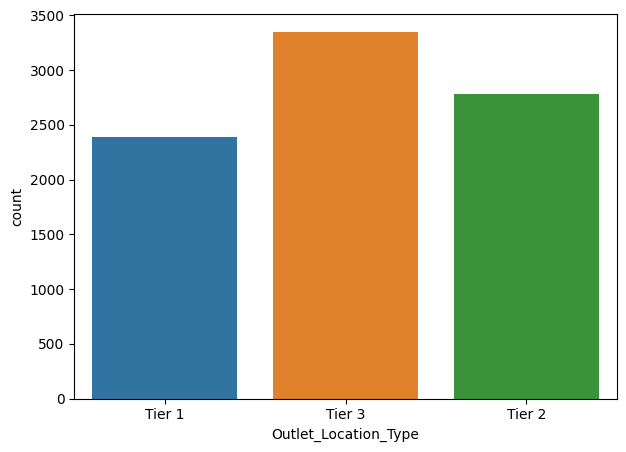

In [38]:
#   Store Location Type
plt.figure(figsize=(7,5))
sns.countplot(data=df_train, x='Outlet_Location_Type')
plt.show()

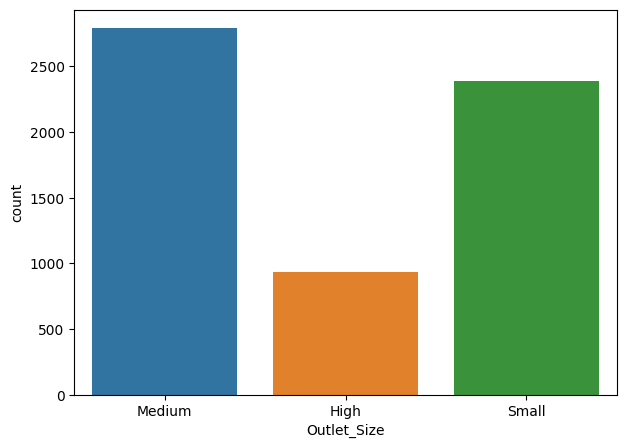

In [39]:
# store_size
plt.figure(figsize=(7,5))
sns.countplot(data=df_train, x='Outlet_Size')
plt.show()

> histogram for numerical

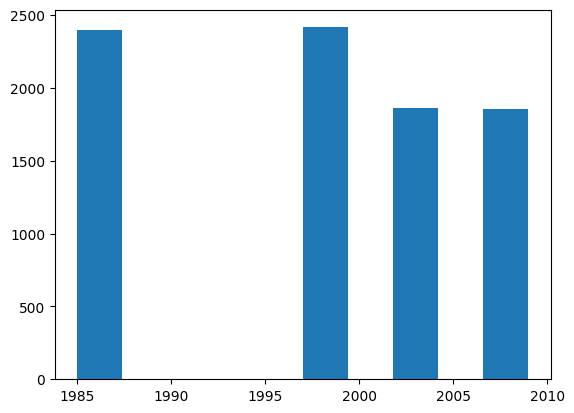

In [40]:
plt.hist(x=df_train['Outlet_Establishment_Year'])
plt.show()

from the previous histogram,i think its better to work with the age of the store instead its Establishment Year

In [41]:
df_train['Outlet_Establishment_Year'] = 2013 - df_train['Outlet_Establishment_Year']
df_test['Outlet_Establishment_Year'] = 2013 - df_test['Outlet_Establishment_Year']

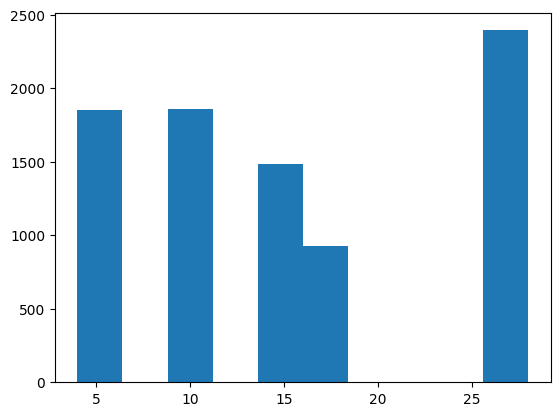

In [42]:
plt.hist(x=df_train['Outlet_Establishment_Year'])
plt.show()

box plots done before in the EDA section to check outliers

**Bivariate Analysis**

> For Categorical

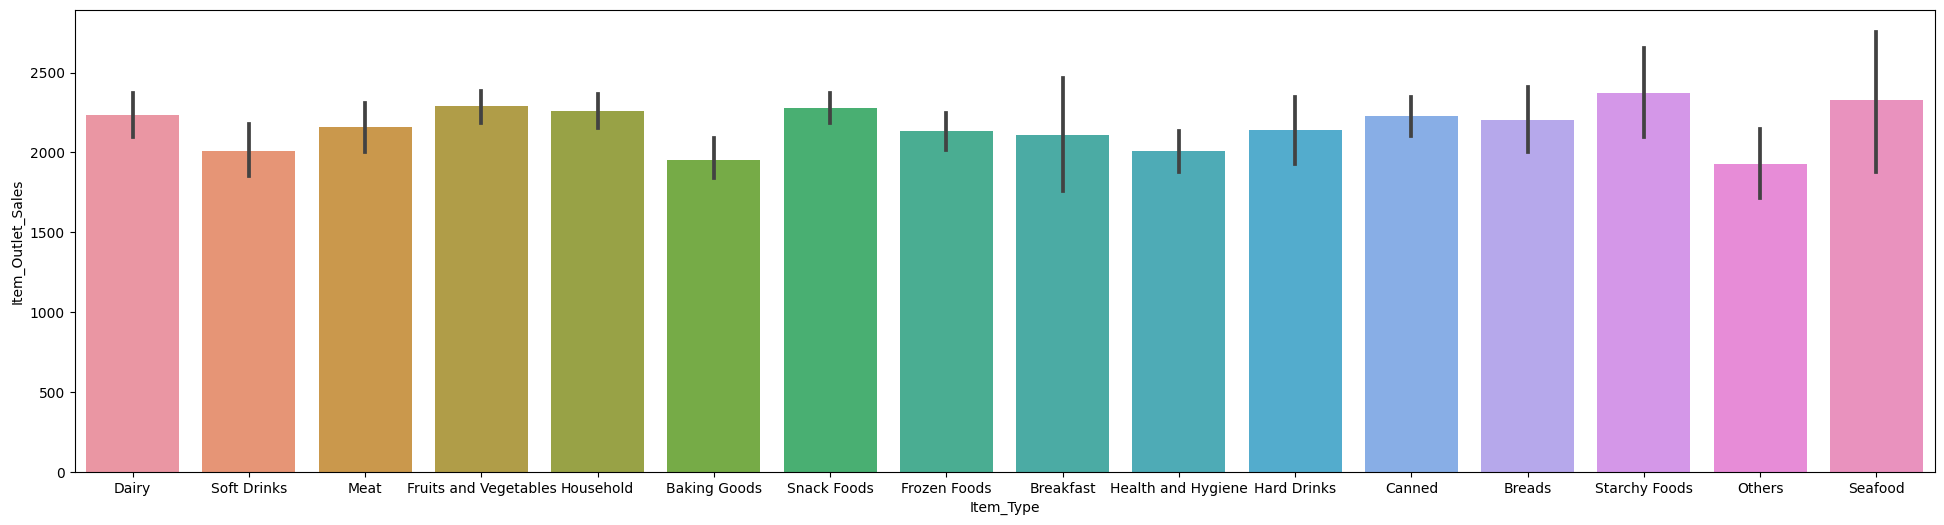

In [43]:
# BarPlot to visualize Sales depends on Item_Type
plt.figure(figsize=(24,6))
sns.barplot(data=df_train, x='Item_Type', y='Item_Outlet_Sales')
plt.show()

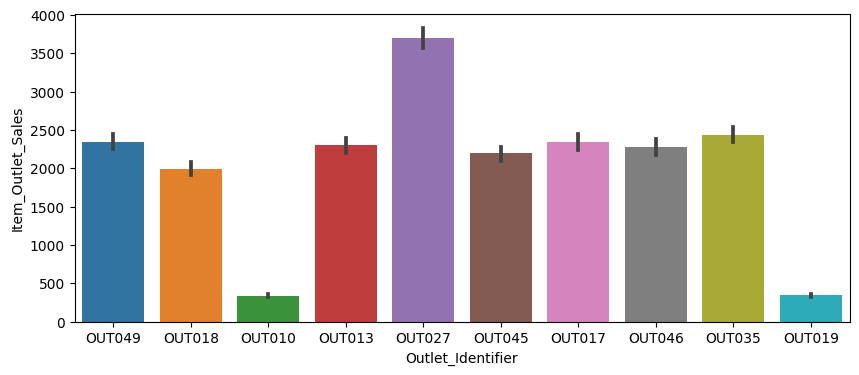

In [44]:
# BarPlot to visualize Sales depends on store Identifier
plt.figure(figsize=(10,4))
sns.barplot(data=df_train, x='Outlet_Identifier', y='Item_Outlet_Sales')
plt.show()

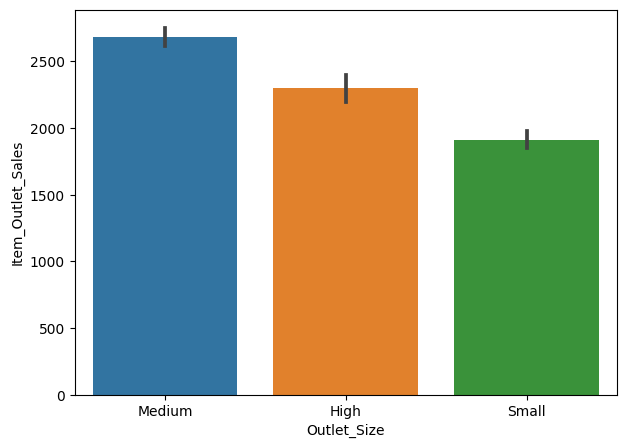

In [45]:
# BarPlot to visualize Sales depends on store size
plt.figure(figsize=(7,5))
sns.barplot(data=df_train, x='Outlet_Size', y='Item_Outlet_Sales')
plt.show()

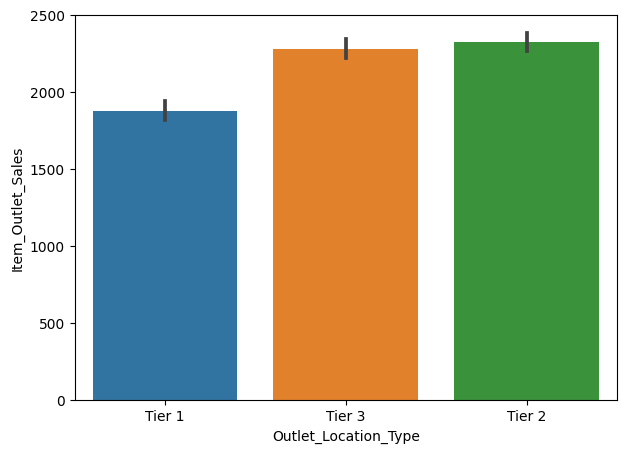

In [46]:
# BarPlot to visualize Sales per depends on Location Type
plt.figure(figsize=(7,5))
sns.barplot(data=df_train, x='Outlet_Location_Type', y='Item_Outlet_Sales')
plt.show()

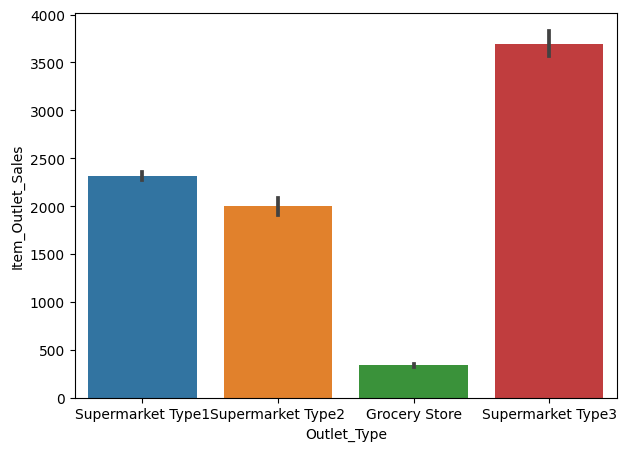

In [47]:
# BarPlot to visualize Sales depends on store Type
plt.figure(figsize=(7,5))
sns.barplot(data=df_train, x='Outlet_Type', y='Item_Outlet_Sales')
plt.show()

> For Numeric

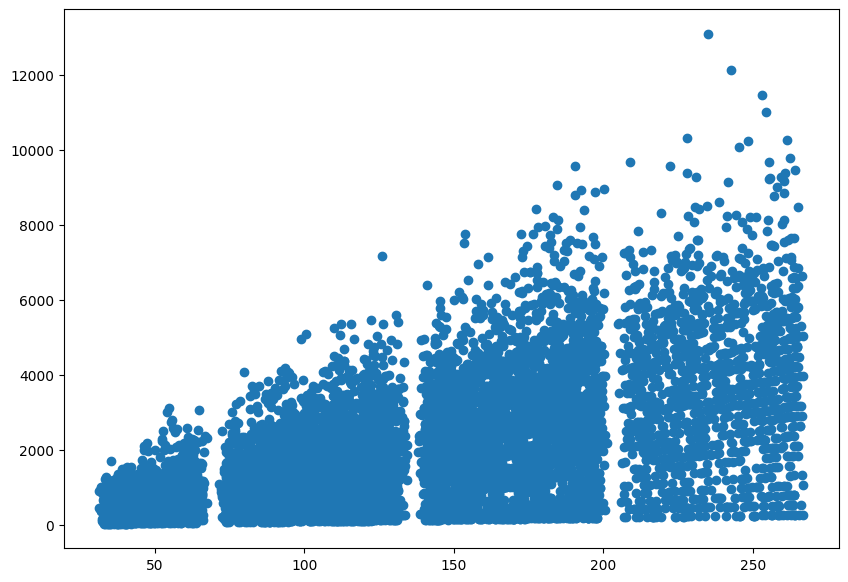

In [48]:
# ScatterPlot to visualize Sales depends on Item MRP
plt.figure(figsize=(10,7))
plt.scatter(df_train['Item_MRP'], df_train['Item_Outlet_Sales'])
plt.show()

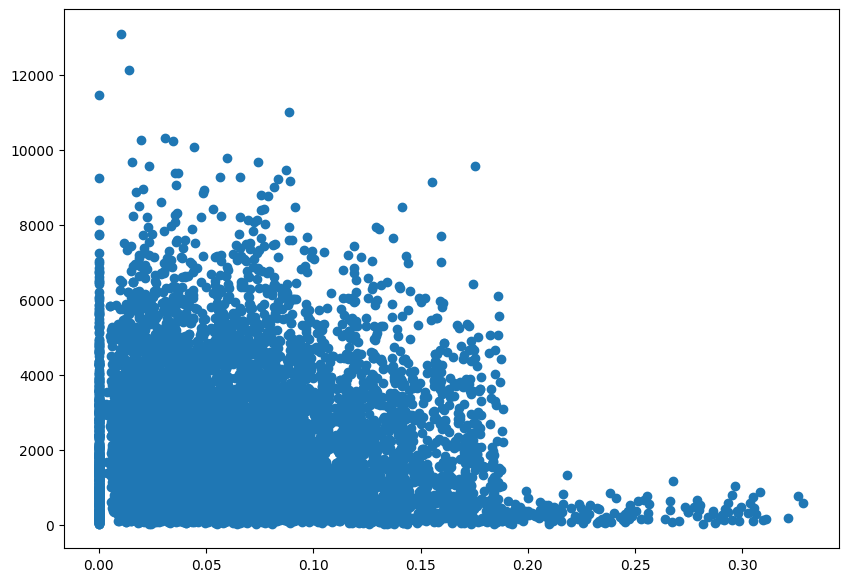

In [49]:
# ScatterPlot to visualize Sales depends on Item_Visibilty
plt.figure(figsize=(10,7))
plt.scatter(df_train['Item_Visibility'], df_train['Item_Outlet_Sales'])
plt.show()

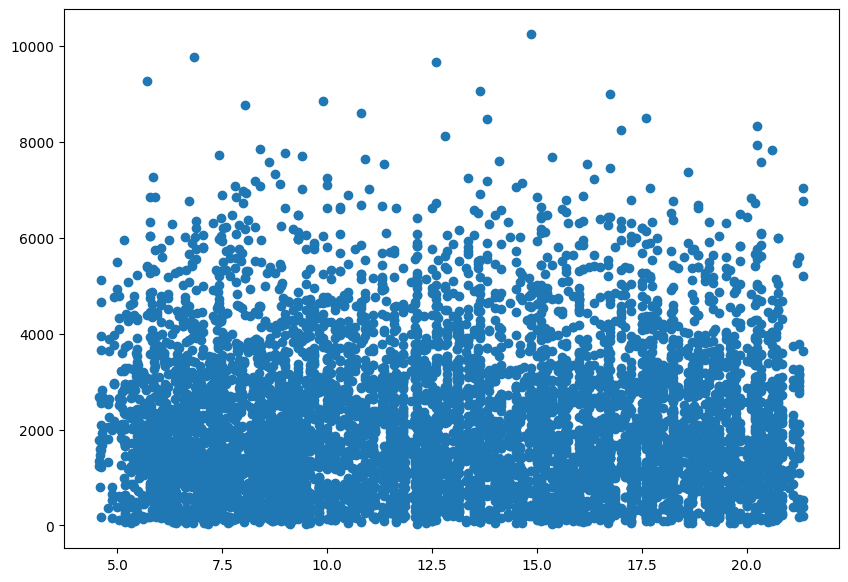

In [50]:
# ScatterPlot to visualize Sales depends on Item_Weight
plt.figure(figsize=(10,7))
plt.scatter(df_train['Item_Weight'], df_train['Item_Outlet_Sales'])
plt.show()

correlation matrix done before in the EDA section

**Multivariate plots**

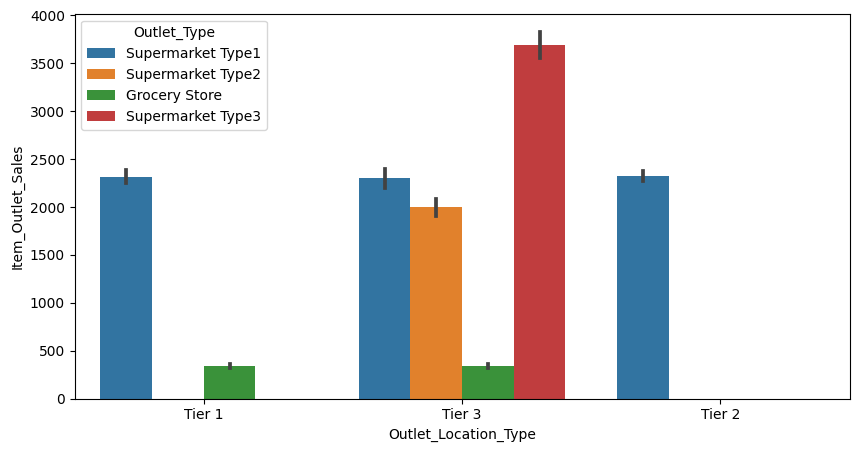

In [51]:
# store Type in all store location based on sales.
plt.figure(figsize=(10,5))
sns.barplot(data=df_train, x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Type')
plt.show()

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

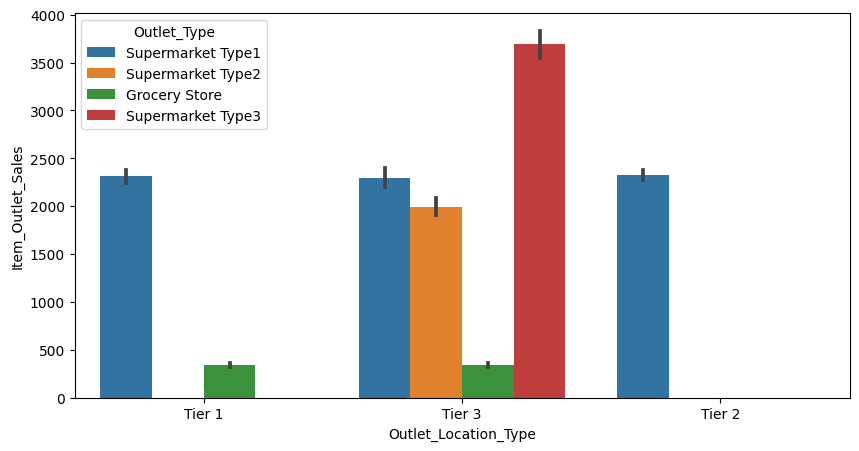

In [52]:
# store Location Type of store Type based on sales.
plt.figure(figsize=(10,5))
sns.barplot( data=df_train, x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Type')

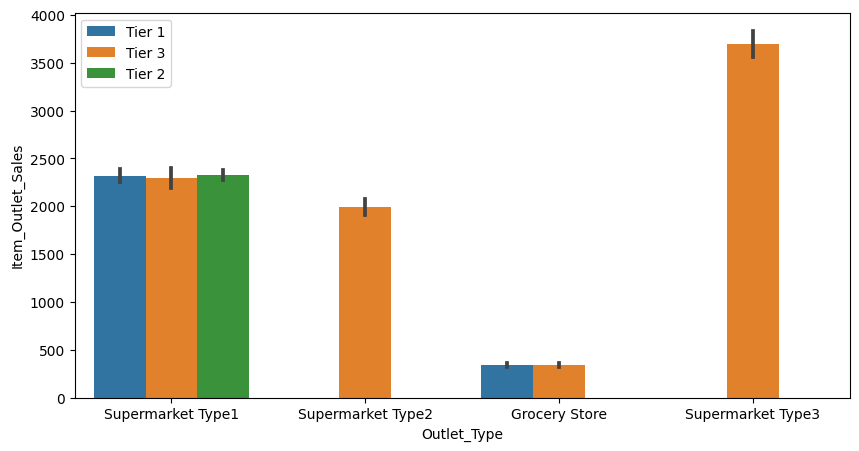

In [53]:
# store Type of store Location Type based on sales.
plt.figure(figsize=(10,5))
sns.barplot(data=df_train, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Location_Type')
plt.legend()

**Missing Value Treatment**

In [54]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace = True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(), inplace = True)

In [55]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [56]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0], inplace = True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0], inplace = True)

In [57]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [58]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

**Feature Engineering**

Feature Preprocessing

1. feature transformation

> > treat the right skewed distribution

its optional to do this step.
when i tried to do feature transformation this improves the accuracy of each model, but changes the nature of the data, so i skipped this step

In [59]:
# df_train['Item_Outlet_Sales'] = np.sqrt(df_train['Item_Outlet_Sales'])
# sns.distplot(df_train['Item_Outlet_Sales'])

In [60]:
# df_train['Item_Visibility'] = np.sqrt(df_train['Item_Visibility'])
# df_test['Item_Visibility'] = np.sqrt(df_test['Item_Visibility'])
# sns.distplot(df_train['Item_Visibility'])
# sns.distplot(df_test['Item_Visibility'])

2. Feature mismatch

In [61]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

in the previous cell  'Item_Fat_Content' has two values mean the same.
>  
1. Low Fat=LF=low fat
2. Regular=reg

so we need to solve this issue

In [62]:
mapping = {"Low Fat": "Low Fat", "LF": "Low Fat", "low fat": "Low Fat", "Regular": "Regular", "reg": "Regular"}
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].map(mapping)
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].map(mapping)

In [63]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

looking to 'Item_Identifier' column you can see too much unique values but they all have common part, so we will work on this common part

In [64]:
#     FD : Food     ,     DR : Drinks     ,     NC : Non-Consumable
df_train['Item_Identifier'] = df_train['Item_Identifier'].apply(lambda x: x[:2])
df_test['Item_Identifier'] = df_test['Item_Identifier'].apply(lambda x: x[:2])


3. Feature Scaling

In [65]:
# MinMaxScaler
scaler = MinMaxScaler()
df_train['Item_MRP'] = scaler.fit_transform(df_train['Item_MRP'].to_numpy().reshape(-1, 1))
df_test['Item_MRP'] = scaler.fit_transform(df_test['Item_MRP'].to_numpy().reshape(-1, 1))

Dimesnsionality reduction

In [66]:
df_train.drop(['Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Outlet_Identifier'],axis=1,inplace=True)

Remove Outliers

> before in the EDA section i checked the outlier values start and Know the values needs to be droped

In [67]:
df_train.drop(df_train[df_train['Item_Outlet_Sales'] > 6094.307].index, inplace = True)

<Axes: >

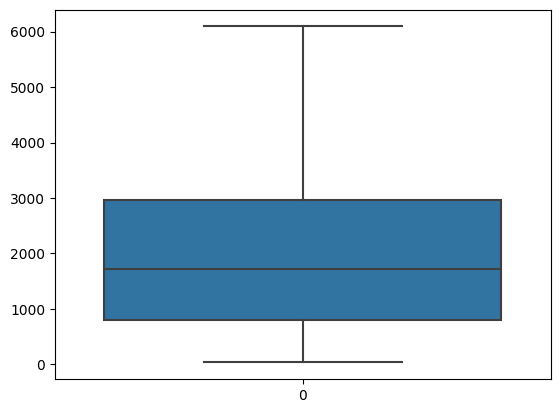

In [68]:
sns.boxplot(df_train['Item_Outlet_Sales'])

In [69]:
df_train.drop(df_train[df_train['Item_Visibility'] >0.187].index, inplace = True)

<Axes: >

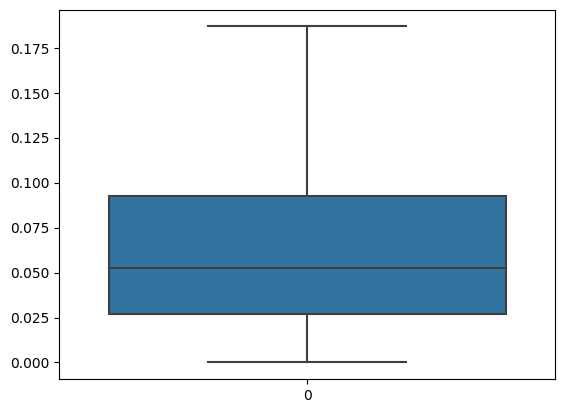

In [70]:
sns.boxplot(df_train['Item_Visibility'])

In [71]:
df_test.drop(df_test[df_test['Item_Visibility'] >0.185].index, inplace = True)

<Axes: >

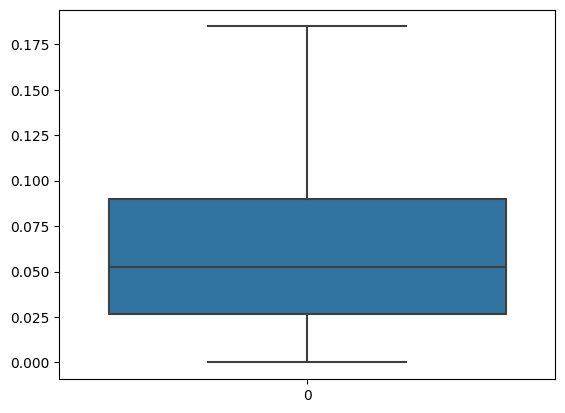

In [72]:
sns.boxplot(df_test['Item_Visibility'])

**Encoding Categorical Variables**

In [73]:
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [74]:

mapping = {"Low Fat": 0, "Regular": 1}
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].map(mapping)
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].map(mapping)

In [75]:
df_train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [76]:
df_test['Item_Type'].unique()

array(['Snack Foods', 'Dairy', 'Others', 'Fruits and Vegetables',
       'Baking Goods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
       'Seafood', 'Soft Drinks', 'Household', 'Frozen Foods', 'Meat',
       'Canned', 'Starchy Foods', 'Breakfast'], dtype=object)

In [77]:
mapping = {"Dairy":0, "Soft Drinks":1, "Meat":2, "Fruits and Vegetables":3, "Household":4,
           "Baking Goods":5, "Snack Foods":6, "Frozen Foods":7, "Breakfast":8, "Health and Hygiene":9,
           "Hard Drinks":10, "Canned":11, "Breads":12, "Starchy Foods":13, "Others":14, "Seafood":15}
df_train['Item_Type'] = df_train['Item_Type'].map(mapping)
df_test['Item_Type'] = df_test['Item_Type'].map(mapping)

In [78]:
df_train['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [79]:
mapping = {"Medium": 0, "High": 1, "Small": 2}
df_train['Outlet_Size'] = df_train['Outlet_Size'].map(mapping)
df_test['Outlet_Size'] = df_test['Outlet_Size'].map(mapping)

In [80]:
df_train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [81]:
mapping = {"Tier 1": 0, "Tier 2": 1, "Tier 3": 2}
df_train['Outlet_Location_Type'] = df_train['Outlet_Location_Type'].map(mapping)
df_test['Outlet_Location_Type'] = df_test['Outlet_Location_Type'].map(mapping)

In [82]:
df_train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [83]:
mapping = {"Grocery Store": 0, "Supermarket Type1": 1, "Supermarket Type2": 2, "Supermarket Type3": 3}
df_train['Outlet_Type'] = df_train['Outlet_Type'].map(mapping)
df_test['Outlet_Type'] = df_test['Outlet_Type'].map(mapping)

In [84]:
df_train['Item_Identifier'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [85]:
mapping = {"FD": 0, "DR": 1, "NC": 2}
df_train['Item_Identifier'] = df_train['Item_Identifier'].map(mapping)
df_test['Item_Identifier'] = df_test['Item_Identifier'].map(mapping)

**Preprocessing Data**

In [86]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,9.30,0,0.016047,0,0.927507,14,0,0,1,3735.1380
1,1,5.92,1,0.019278,1,0.072068,4,0,2,2,443.4228
2,0,17.50,0,0.016760,2,0.468288,14,0,0,1,2097.2700
3,0,19.20,1,0.000000,3,0.640093,15,0,2,0,732.3800
4,2,8.93,0,0.000000,4,0.095805,26,1,2,1,994.7052


In [87]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,20.750000,0,0.007565,6,0.323413,14,0,0,1
1,0,8.300000,1,0.038428,0,0.235849,6,0,1,1
2,2,14.600000,0,0.099575,14,0.894140,15,0,2,0
3,0,7.315000,0,0.015388,6,0.524488,6,0,1,1
4,0,12.695633,1,0.118599,0,0.862069,28,0,2,3


In [88]:
y = df_train.Item_Outlet_Sales
df_train.drop(columns = ['Item_Outlet_Sales'], inplace = True)
x = df_train

**Modeling**


> Linear regression is probably one of the most important and widely used regression techniques. It’s among the simplest regression methods. One of its main advantages is the ease of interpreting results.
Problem Formulation

> When implementing linear regression of some dependent variable 𝑦 on the set of independent variables 𝐱 = (𝑥₁, …, 𝑥ᵣ), where 𝑟 is the number of predictors, you assume a linear relationship between 𝑦 and 𝐱: 𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀. This equation is the regression equation. 𝛽₀, 𝛽₁, …, 𝛽ᵣ are the regression coefficients, and 𝜀 is the random error.

> Linear regression calculates the estimators of the regression coefficients or simply the predicted weights, denoted with 𝑏₀, 𝑏₁, …, 𝑏ᵣ. These estimators define the estimated regression function 𝑓(𝐱) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ᵣ𝑥ᵣ. This function should capture the dependencies between the inputs and output sufficiently well.

> The estimated or predicted response, 𝑓(𝐱ᵢ), for each observation 𝑖 = 1, …, 𝑛, should be as close as possible to the corresponding actual response 𝑦ᵢ. The differences 𝑦ᵢ - 𝑓(𝐱ᵢ) for all observations 𝑖 = 1, …, 𝑛, are called the residuals. Regression is about determining the best predicted weights—that is, the weights corresponding to the smallest residuals.

> To get the best weights, you usually minimize the sum of squared residuals (SSR) for all observations 𝑖 = 1, …, 𝑛: SSR = Σᵢ(𝑦ᵢ - 𝑓(𝐱ᵢ))². This approach is called the method of ordinary least squares.



> Random Forest is a technique that uses ensemble learning, that combines many weak classifiers to provide solutions to complex problems.

> As the name suggests random forest consists of many decision trees. Rather than depending on one tree it takes the prediction from each tree and based on the majority votes of predictions, predicts the final output. Don’t worry if you haven’t read about decision trees, I have that part covered in this article.



> Ensemble Techniques

> Suppose you want to purchase a house, will you just walk into society and purchase the very first house you see, or based on the advice of your broker will you buy a house? It’s highly unlikely.

> You would likely browse a few web portals, checking for the area, number of bedrooms, facilities, price, etc. You will also probably ask your friends and colleagues for their opinion. In short, you wouldn’t directly reach a conclusion, but will instead make a decision considering the opinions of other people as well.

> Ensemble techniques work in a similar manner, it simply combines multiple models. Thus, a collection of models is used to make predictions rather than an individual model and this will increase the overall performance. Let’s understand 2 main ensemble methods in Machine Learning:

> 1. Bagging – Suppose we have a dataset, and we make different models on the same dataset and combine it, will it be useful? No right? There is a high chance we’ll get the same results since we are giving the same input. So instead we use a technique called bootstrapping. In this, we create subsets of the original dataset with replacement. The size of the subsets is the same as the size of the original set. Since we do this with replacement so there is a high chance that we provide different data points to our models.

> 2. Boosting – Suppose any data point in your observation has been incorrectly classified by your 1st model, and then the next (probably all the models), will combine the predictions provide better results? Off-course it’s a big NO.

> Boosting technique is a sequential process, where each model tries to correct the errors of the previous model. The succeeding models are dependent on the previous model.

> It combines weak learners into strong learners by creating sequential models such that the final model has the highest accuracy. For example, ADA BOOST, XG BOOST.

split the data

In [89]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state = 1)

**RandomForestRegressor**

In [95]:
randomForecetModel = RandomForestRegressor(n_estimators=200, criterion='poisson', max_depth=10, max_features=6, oob_score=True).fit(x_train, y_train)
pre = randomForecetModel.predict(x_val)
print(randomForecetModel.score(x_val, y_val))
print(mean_absolute_error(y_val, pre))

0.5914296572637516
680.4015199503848


**LinearRegression**

In [91]:
linearModel = LinearRegression(fit_intercept=False).fit(x_train, y_train)
pre = linearModel.predict(x_val)
print(linearModel.score(x_val, y_val))
print(mean_absolute_error(y_val, pre))

0.48849934193608846
809.0428782211786


**XGBRegressor**

In [92]:
XGBoostModel = XGBRegressor().fit(x_train, y_train)
pre = XGBoostModel.predict(x_val)
print(XGBoostModel.score(x_val, y_val))
print(mean_absolute_error(y_val, pre))

0.5403162260062621
727.2394221261733


**Lasso Regression**

In [93]:
model_lasso = Lasso(alpha=0.05).fit(x_train, y_train)
pre = model_lasso.predict(x_val)
print(model_lasso.score(x_val, y_val))
print(mean_absolute_error(y_val, pre))

0.4891993934376859
808.3360595045884


**Ridge Regression**

In [94]:
model_ridge = Ridge().fit(x_train, y_train)
pre = model_ridge.predict(x_val)
print(model_ridge.score(x_val, y_val))
print(mean_absolute_error(y_val, pre))

0.4892180643098002
808.3678100363081


**Summary**

according to the preveous models:
> RandomForestRegressor has the best accurecy with Mean_Absolute_Error=680
.so i will predict the Item_Outlet_Sales of the test data

In [96]:
predected_values = randomForecetModel.predict(df_test)
# predected_values

now variable "predected_values" contains the predicted values